### IMPORTING MODULES

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

### IMPORTING TEST DATA

In [2]:
img = cv2.imread(r'.\test\jv.jpg')
img.shape

(2560, 2451, 3)

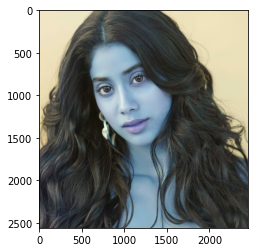

In [4]:
plt.imshow(img)

### IDENTIFYING FACE AND EYES FROM TEST IMAGE

In [5]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(2560, 2451)

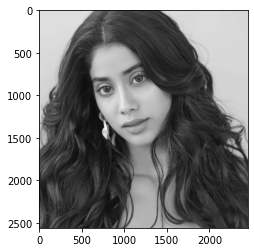

In [6]:
plt.imshow(gray, cmap= 'gray')

In [7]:
# IMPORTING HAAR CASCADES
face_cascade = cv2.CascadeClassifier(r'.\opencv\haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(r'.\opencv\haarcascade_eye.xml')
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[ 417,  415, 1181, 1181]])

In [8]:
x,y,w,h = faces[0]
x,y,w,h

(417, 415, 1181, 1181)

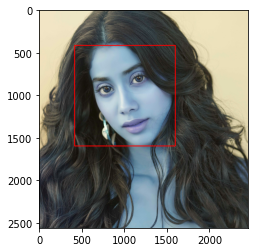

In [9]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),10)
plt.imshow(face_img)

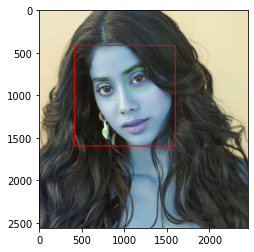

In [10]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        
plt.imshow(img)

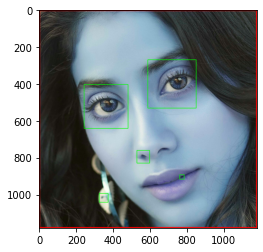

In [11]:
plt.imshow(roi_color)

In [12]:
#FUNCTION TO GET CROPPED FACE IF NUMBER OF EYES FOR EACH FACE IS GREATER THAN 2
def get_cropped_image_if_2_eyes(img_path):
    img = cv2.imdecode(np.fromfile(img_path, dtype=np.uint8),cv2.IMREAD_UNCHANGED)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    crrpd_img = []
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes)>=2:
            crrpd_img.append(roi_color)
    return crrpd_img

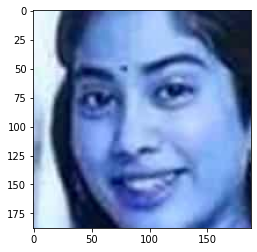

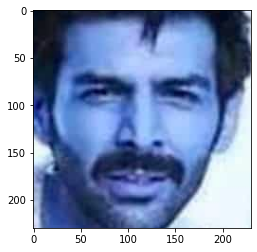

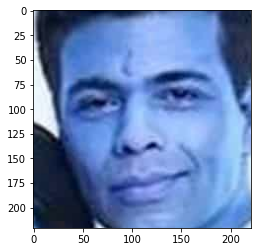

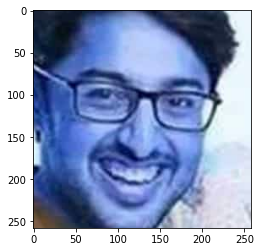

In [13]:
cropped_img = get_cropped_image_if_2_eyes(r'.\test\ka.jpg')
for i in cropped_img:
    plt.figure()
    plt.imshow(i)

#### PATH OF DATASET AND CROP DATASET

In [14]:
path_to_data = r"./datasets/"
path_to_cr_data = r"./datasets/cropped/"

In [15]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [16]:
img_dirs

['./datasets/jahnvi_kapoor',
 './datasets/kartik_aaryan',
 './datasets/kiara_advani',
 './datasets/kriti_sanon',
 './datasets/shahid_kapoor']

In [17]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [19]:
#GENERATING CROPPED IMAGES
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print('\n'+celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            for facess in roi_color:
                cv2.imwrite(cropped_file_path, facess)
                celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
                count += 1 


jahnvi_kapoor
Generating cropped images in folder:  ./datasets/cropped/jahnvi_kapoor
./datasets/cropped/jahnvi_kapoor/jahnvi_kapoor1.png
./datasets/cropped/jahnvi_kapoor/jahnvi_kapoor1.png
./datasets/cropped/jahnvi_kapoor/jahnvi_kapoor1.png
./datasets/cropped/jahnvi_kapoor/jahnvi_kapoor2.png
./datasets/cropped/jahnvi_kapoor/jahnvi_kapoor3.png
./datasets/cropped/jahnvi_kapoor/jahnvi_kapoor4.png
./datasets/cropped/jahnvi_kapoor/jahnvi_kapoor5.png
./datasets/cropped/jahnvi_kapoor/jahnvi_kapoor6.png
./datasets/cropped/jahnvi_kapoor/jahnvi_kapoor7.png
./datasets/cropped/jahnvi_kapoor/jahnvi_kapoor7.png
./datasets/cropped/jahnvi_kapoor/jahnvi_kapoor8.png
./datasets/cropped/jahnvi_kapoor/jahnvi_kapoor8.png
./datasets/cropped/jahnvi_kapoor/jahnvi_kapoor8.png
./datasets/cropped/jahnvi_kapoor/jahnvi_kapoor8.png
./datasets/cropped/jahnvi_kapoor/jahnvi_kapoor8.png
./datasets/cropped/jahnvi_kapoor/jahnvi_kapoor9.png
./datasets/cropped/jahnvi_kapoor/jahnvi_kapoor9.png
./datasets/cropped/jahnvi_kapo

./datasets/cropped/kartik_aaryan/kartik_aaryan4.png
./datasets/cropped/kartik_aaryan/kartik_aaryan5.png
./datasets/cropped/kartik_aaryan/kartik_aaryan5.png
./datasets/cropped/kartik_aaryan/kartik_aaryan6.png
./datasets/cropped/kartik_aaryan/kartik_aaryan6.png
./datasets/cropped/kartik_aaryan/kartik_aaryan7.png
./datasets/cropped/kartik_aaryan/kartik_aaryan8.png
./datasets/cropped/kartik_aaryan/kartik_aaryan8.png
./datasets/cropped/kartik_aaryan/kartik_aaryan8.png
./datasets/cropped/kartik_aaryan/kartik_aaryan8.png
./datasets/cropped/kartik_aaryan/kartik_aaryan8.png
./datasets/cropped/kartik_aaryan/kartik_aaryan8.png
./datasets/cropped/kartik_aaryan/kartik_aaryan9.png
./datasets/cropped/kartik_aaryan/kartik_aaryan9.png
./datasets/cropped/kartik_aaryan/kartik_aaryan9.png
./datasets/cropped/kartik_aaryan/kartik_aaryan10.png
./datasets/cropped/kartik_aaryan/kartik_aaryan10.png
./datasets/cropped/kartik_aaryan/kartik_aaryan11.png
./datasets/cropped/kartik_aaryan/kartik_aaryan13.png
./datase

./datasets/cropped/kartik_aaryan/kartik_aaryan101.png
./datasets/cropped/kartik_aaryan/kartik_aaryan102.png
./datasets/cropped/kartik_aaryan/kartik_aaryan103.png
./datasets/cropped/kartik_aaryan/kartik_aaryan107.png
./datasets/cropped/kartik_aaryan/kartik_aaryan107.png
./datasets/cropped/kartik_aaryan/kartik_aaryan107.png
./datasets/cropped/kartik_aaryan/kartik_aaryan107.png
./datasets/cropped/kartik_aaryan/kartik_aaryan108.png
./datasets/cropped/kartik_aaryan/kartik_aaryan109.png
./datasets/cropped/kartik_aaryan/kartik_aaryan110.png
./datasets/cropped/kartik_aaryan/kartik_aaryan111.png
./datasets/cropped/kartik_aaryan/kartik_aaryan111.png
./datasets/cropped/kartik_aaryan/kartik_aaryan111.png
./datasets/cropped/kartik_aaryan/kartik_aaryan112.png
./datasets/cropped/kartik_aaryan/kartik_aaryan115.png
./datasets/cropped/kartik_aaryan/kartik_aaryan116.png

kiara_advani
Generating cropped images in folder:  ./datasets/cropped/kiara_advani
./datasets/cropped/kiara_advani/kiara_advani1.png
./

./datasets/cropped/kiara_advani/kiara_advani119.png
./datasets/cropped/kiara_advani/kiara_advani120.png
./datasets/cropped/kiara_advani/kiara_advani121.png
./datasets/cropped/kiara_advani/kiara_advani122.png
./datasets/cropped/kiara_advani/kiara_advani122.png
./datasets/cropped/kiara_advani/kiara_advani122.png
./datasets/cropped/kiara_advani/kiara_advani123.png
./datasets/cropped/kiara_advani/kiara_advani123.png
./datasets/cropped/kiara_advani/kiara_advani124.png
./datasets/cropped/kiara_advani/kiara_advani125.png
./datasets/cropped/kiara_advani/kiara_advani126.png
./datasets/cropped/kiara_advani/kiara_advani127.png
./datasets/cropped/kiara_advani/kiara_advani127.png
./datasets/cropped/kiara_advani/kiara_advani128.png
./datasets/cropped/kiara_advani/kiara_advani129.png
./datasets/cropped/kiara_advani/kiara_advani130.png
./datasets/cropped/kiara_advani/kiara_advani131.png
./datasets/cropped/kiara_advani/kiara_advani131.png
./datasets/cropped/kiara_advani/kiara_advani131.png
./datasets/c

./datasets/cropped/kriti_sanon/kriti_sanon104.png
./datasets/cropped/kriti_sanon/kriti_sanon106.png
./datasets/cropped/kriti_sanon/kriti_sanon109.png
./datasets/cropped/kriti_sanon/kriti_sanon109.png
./datasets/cropped/kriti_sanon/kriti_sanon110.png
./datasets/cropped/kriti_sanon/kriti_sanon111.png
./datasets/cropped/kriti_sanon/kriti_sanon112.png
./datasets/cropped/kriti_sanon/kriti_sanon113.png
./datasets/cropped/kriti_sanon/kriti_sanon114.png
./datasets/cropped/kriti_sanon/kriti_sanon115.png
./datasets/cropped/kriti_sanon/kriti_sanon116.png
./datasets/cropped/kriti_sanon/kriti_sanon117.png
./datasets/cropped/kriti_sanon/kriti_sanon118.png
./datasets/cropped/kriti_sanon/kriti_sanon118.png
./datasets/cropped/kriti_sanon/kriti_sanon119.png
./datasets/cropped/kriti_sanon/kriti_sanon119.png
./datasets/cropped/kriti_sanon/kriti_sanon120.png
./datasets/cropped/kriti_sanon/kriti_sanon122.png
./datasets/cropped/kriti_sanon/kriti_sanon123.png
./datasets/cropped/kriti_sanon/kriti_sanon124.png


./datasets/cropped/shahid_kapoor/shahid_kapoor52.png
./datasets/cropped/shahid_kapoor/shahid_kapoor53.png
./datasets/cropped/shahid_kapoor/shahid_kapoor53.png
./datasets/cropped/shahid_kapoor/shahid_kapoor54.png
./datasets/cropped/shahid_kapoor/shahid_kapoor55.png
./datasets/cropped/shahid_kapoor/shahid_kapoor55.png
./datasets/cropped/shahid_kapoor/shahid_kapoor57.png
./datasets/cropped/shahid_kapoor/shahid_kapoor57.png
./datasets/cropped/shahid_kapoor/shahid_kapoor57.png
./datasets/cropped/shahid_kapoor/shahid_kapoor59.png
./datasets/cropped/shahid_kapoor/shahid_kapoor59.png
./datasets/cropped/shahid_kapoor/shahid_kapoor60.png
./datasets/cropped/shahid_kapoor/shahid_kapoor65.png
./datasets/cropped/shahid_kapoor/shahid_kapoor67.png
./datasets/cropped/shahid_kapoor/shahid_kapoor68.png
./datasets/cropped/shahid_kapoor/shahid_kapoor68.png
./datasets/cropped/shahid_kapoor/shahid_kapoor69.png
./datasets/cropped/shahid_kapoor/shahid_kapoor71.png
./datasets/cropped/shahid_kapoor/shahid_kapoor

In [21]:
#2 Dimensional Wraping for Image classification

import pywt
def w2d(img, mode='haar', level=1):
    imArray = img
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    imArray =  np.float32(imArray)   
    imArray /= 255;
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

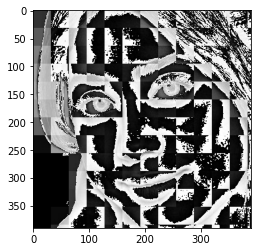

In [22]:
cropped_imge = cv2.imread(r".\test\jv3.png")
vav = w2d(cropped_imge,'db1',5)
plt.imshow(vav, cmap="gray")

In [23]:
#CREATING CLASS DICTIONARY FOR CELEBRITIES
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'jahnvi_kapoor': 0,
 'kartik_aaryan': 1,
 'kiara_advani': 2,
 'kriti_sanon': 3,
 'shahid_kapoor': 4}

In [24]:
#PREPAIRING X AND Y FOR MODEL TRAINING
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img,(32,32))
        img_har = w2d(img, 'db1',5)
        scalled_img_har = cv2.resize(img_har,(32,32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [25]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(564, 4096)

### MODEL

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

In [28]:
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [33]:
pipe = Pipeline([('scaler', StandardScaler()), ('svc', svm.SVC())])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.7375886524822695

In [30]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [31]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False, error_score='raise')
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.848655,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.635910,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.827255,{'logisticregression__C': 1}


In [32]:
best_estimators['svm'].score(X_test,y_test)

0.8156028368794326

In [34]:
best_estimators['random_forest'].score(X_test,y_test)

0.6737588652482269

In [35]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.7801418439716312

SVM HAS THE BEST SCORE SO WILL WE USE SVM FOR OUR MODEL

In [36]:
from sklearn.metrics import confusion_matrix
best_clf = best_estimators['svm']
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[13,  0,  2,  4,  0],
       [ 0, 15,  1,  0,  4],
       [ 0,  1, 25,  4,  1],
       [ 1,  0,  2, 39,  0],
       [ 0,  5,  0,  1, 23]], dtype=int64)

<AxesSubplot:>

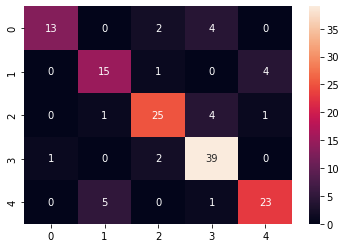

In [37]:
#CHECKING HOW OUR MODEL IS PREDICTING USING HEATMAP
import seaborn as sns
sns.heatmap(cm, annot=True)

In [40]:
#SAVING ARTIFACTS

import joblib
import json
def create_artifacts(dict1, model1):
    path = os.path.abspath('model')
    index = path.find('model')
    dir_path = path[:index]+'server\\artifacts\\'
    
    if not os.path.exists(path):
        os.makedirs(dir_path)
    
    joblib.dump(best_clf, dir_path+'saved_model.pkl')
   
    with open(dir_path+"class_dictionary.json","w") as f:
        f.write(json.dumps(class_dict))

In [41]:
create_artifacts(class_dict, best_clf)